Test accuracy: 0.978


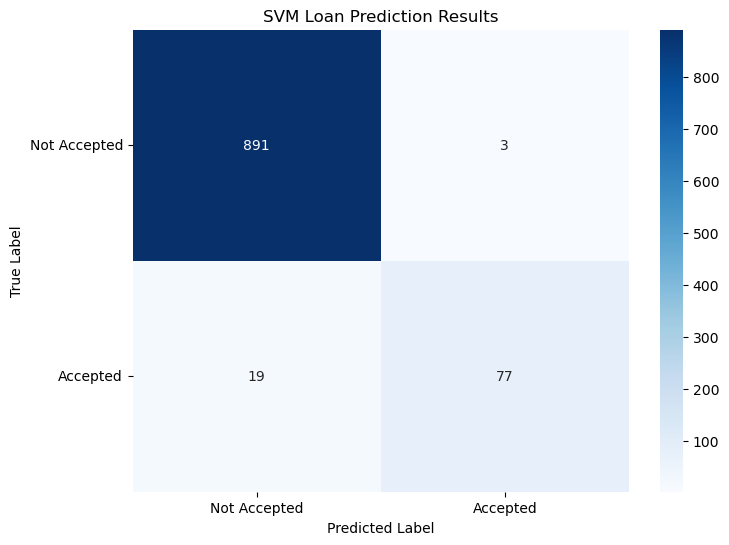

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('UniversalBank.csv')
data = data.drop(['ID', 'ZIP Code'], axis=1)

data = data[data['Experience'] >= 0]
data['Education'] = data['Education'].astype('category')
data = pd.get_dummies(data, columns=['Education'])
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.3f}")
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Accepted', 'Accepted'], 
            yticklabels=['Not Accepted', 'Accepted'])
plt.title('SVM Loan Prediction Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation=0)
plt.show()